In [1]:
# ALWAYS RUN THIS FIRST!
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


NOTEBOOK_DIR = Path("/rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest")
os.chdir(NOTEBOOK_DIR)
sys.path.insert(0, str(NOTEBOOK_DIR))

print(f"✅ Working directory: {os.getcwd()}")

✅ Working directory: /rsrch9/home/plm/idso_fa1_pathology/codes/yshokrollahi/vitamin-p-latest


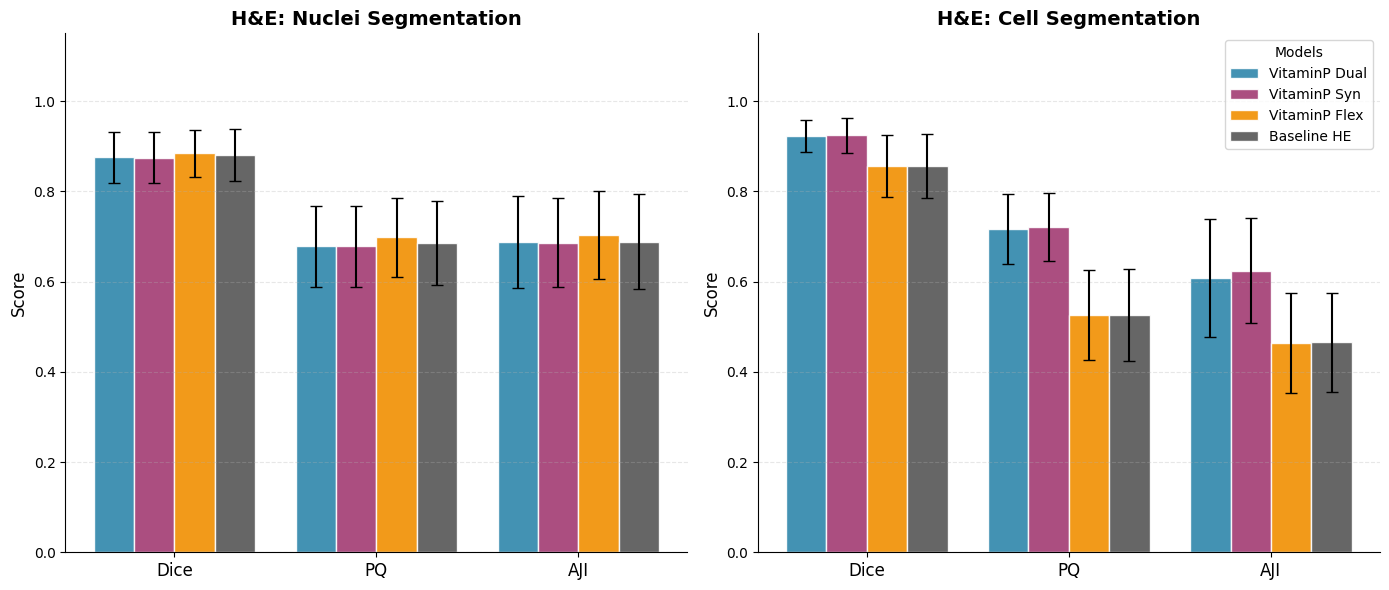

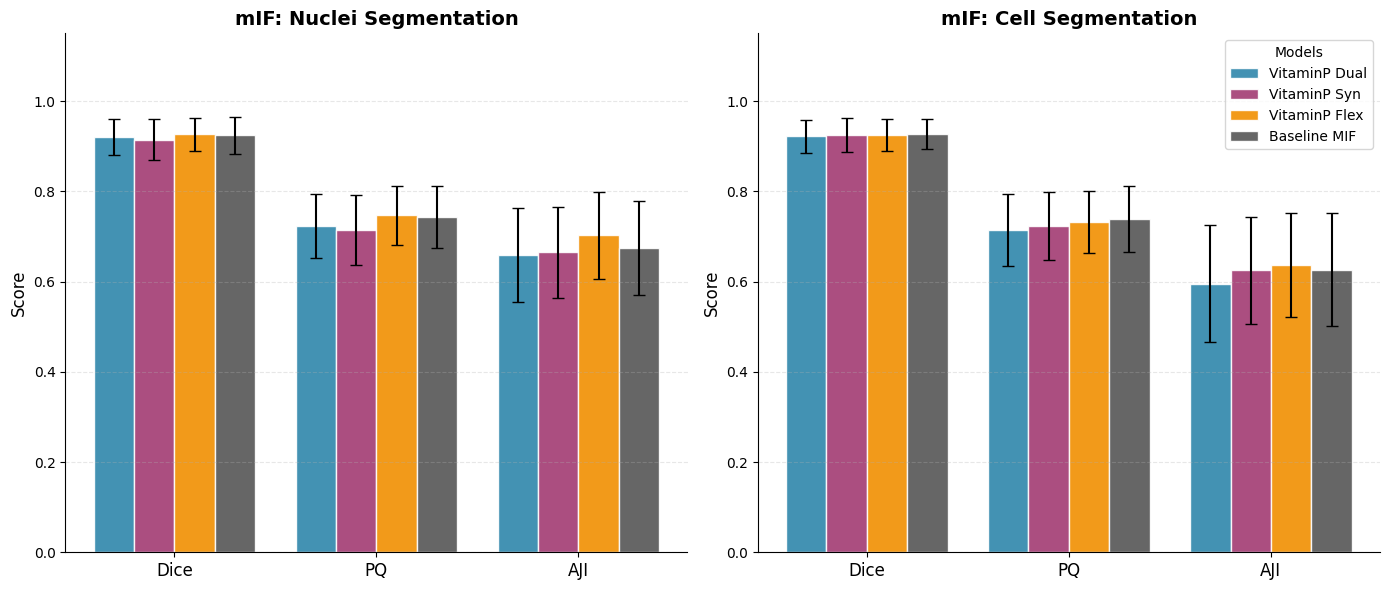

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. FIX FONT ISSUE (Ensures no warnings on any system)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# ---------------------------------------------------------
# 2. Data Definitions (Means and Standard Deviations)
# ---------------------------------------------------------

# H&E Data
he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

# mIF Data
mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

metrics = ['Dice', 'PQ', 'AJI']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#555555'] # Blue, Purple, Orange, Dark Grey

# ---------------------------------------------------------
# 3. Plotting Function
# ---------------------------------------------------------
def create_chart(data_dict, title_prefix, filename_png):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    tasks = ['Nuclei', 'Cell']
    
    for idx, task in enumerate(tasks):
        ax = axes[idx]
        task_data = data_dict[task]
        
        models = list(task_data.keys())
        x = np.arange(len(metrics))
        width = 0.2  

        # Plot bars
        for i, model in enumerate(models):
            means = [task_data[model][m] for m in metrics]
            stds = [task_data[model][f'{m}_std'] for m in metrics]
            
            ax.bar(x + i*width, means, width, label=model, 
                   yerr=stds, capsize=4, color=colors[i], alpha=0.9, edgecolor='white')

        # Formatting
        ax.set_title(f'{title_prefix}: {task} Segmentation', fontsize=14, weight='bold')
        ax.set_xticks(x + width * (len(models) - 1) / 2)
        ax.set_xticklabels(metrics, fontsize=12)
        ax.set_ylim(0, 1.15) 
        ax.set_ylabel('Score', fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.3)
        
        # Clean look
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Legend on the 2nd plot
        if idx == 1:
            ax.legend(loc='upper right', fontsize=10, title="Models", frameon=True)

    plt.tight_layout()
    
    # Save as PNG
    plt.savefig(filename_png, dpi=300, bbox_inches='tight')
    
    # Save as PDF (Vector graphic for Adobe Illustrator)
    filename_pdf = filename_png.replace('.png', '.pdf')
    plt.savefig(filename_pdf, format='pdf', bbox_inches='tight')
    
    plt.show()

# ---------------------------------------------------------
# 4. Generate Charts
# ---------------------------------------------------------

create_chart(he_data, 'H&E', 'HE_Performance_Chart_v3.png')
create_chart(mif_data, 'mIF', 'mIF_Performance_Chart_v3.png')

## Comine all of them

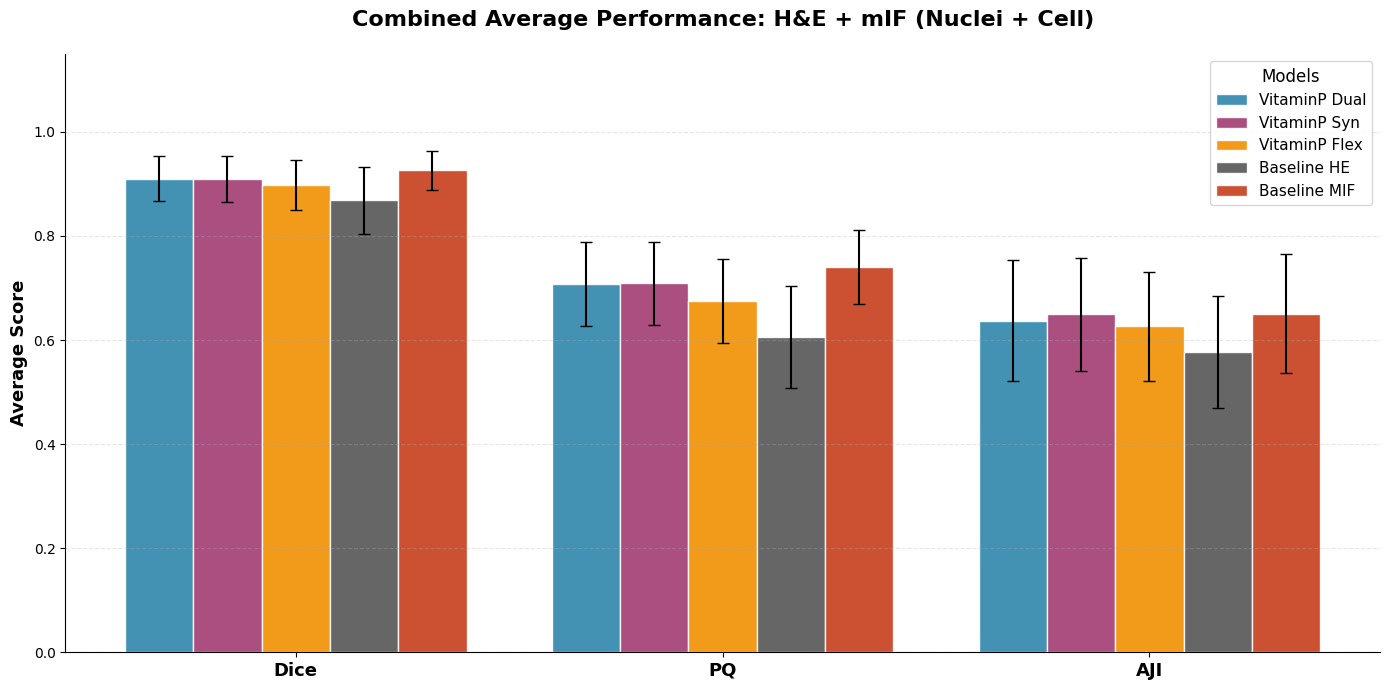


Average Values Across All Conditions:

VitaminP Dual:
  Dice: 0.9101 ± 0.0426
  PQ: 0.7076 ± 0.0800
  AJI: 0.6373 ± 0.1169

VitaminP Syn:
  Dice: 0.9094 ± 0.0446
  PQ: 0.7092 ± 0.0796
  AJI: 0.6499 ± 0.1085

VitaminP Flex:
  Dice: 0.8979 ± 0.0484
  PQ: 0.6755 ± 0.0803
  AJI: 0.6266 ± 0.1049

Baseline HE:
  Dice: 0.8681 ± 0.0641
  PQ: 0.6057 ± 0.0978
  AJI: 0.5768 ± 0.1074

Baseline MIF:
  Dice: 0.9258 ± 0.0374
  PQ: 0.7408 ± 0.0711
  AJI: 0.6502 ± 0.1144


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 1. FIX FONT ISSUE
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# ---------------------------------------------------------
# 2. Data Definitions
# ---------------------------------------------------------

# H&E Data
he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

# mIF Data
mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ---------------------------------------------------------
# 3. Calculate Averages Across All 4 Conditions
# ---------------------------------------------------------

metrics = ['Dice', 'PQ', 'AJI']
models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE', 'Baseline MIF']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#555555', '#C73E1D']  # 5 colors for 5 models

# Calculate averages
averages = {model: {} for model in models}

for model in models:
    for metric in metrics:
        values = []
        stds = []
        
        # Collect values from all 4 conditions
        # H&E Nuclei
        if model in he_data['Nuclei']:
            values.append(he_data['Nuclei'][model][metric])
            stds.append(he_data['Nuclei'][model][f'{metric}_std'])
        
        # H&E Cell
        if model in he_data['Cell']:
            values.append(he_data['Cell'][model][metric])
            stds.append(he_data['Cell'][model][f'{metric}_std'])
        
        # mIF Nuclei
        if model in mif_data['Nuclei']:
            values.append(mif_data['Nuclei'][model][metric])
            stds.append(mif_data['Nuclei'][model][f'{metric}_std'])
        
        # mIF Cell
        if model in mif_data['Cell']:
            values.append(mif_data['Cell'][model][metric])
            stds.append(mif_data['Cell'][model][f'{metric}_std'])
        
        # Calculate mean and std
        if values:
            averages[model][metric] = np.mean(values)
            averages[model][f'{metric}_std'] = np.mean(stds)  # Average of std devs

# ---------------------------------------------------------
# 4. Create Single Combined Chart
# ---------------------------------------------------------

fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(metrics))
width = 0.16  # Width of each bar

# Plot bars for each model
for i, model in enumerate(models):
    means = [averages[model][m] for m in metrics]
    stds = [averages[model][f'{m}_std'] for m in metrics]
    
    ax.bar(x + i*width, means, width, label=model, 
           yerr=stds, capsize=4, color=colors[i], alpha=0.9, edgecolor='white')

# Formatting
ax.set_title('Combined Average Performance: H&E + mIF (Nuclei + Cell)', fontsize=16, weight='bold', pad=20)
ax.set_xticks(x + width * 2)  # Center the labels
ax.set_xticklabels(metrics, fontsize=13, weight='bold')
ax.set_ylim(0, 1.15)
ax.set_ylabel('Average Score', fontsize=13, weight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
ax.legend(loc='upper right', fontsize=11, title="Models", frameon=True, title_fontsize=12)

plt.tight_layout()

# Save
plt.savefig('Combined_Average_Performance.png', dpi=300, bbox_inches='tight')
plt.savefig('Combined_Average_Performance.pdf', format='pdf', bbox_inches='tight')

plt.show()

# ---------------------------------------------------------
# 5. Print Average Values for Verification
# ---------------------------------------------------------
print("\nAverage Values Across All Conditions:")
print("="*60)
for model in models:
    print(f"\n{model}:")
    for metric in metrics:
        print(f"  {metric}: {averages[model][metric]:.4f} ± {averages[model][f'{metric}_std']:.4f}")

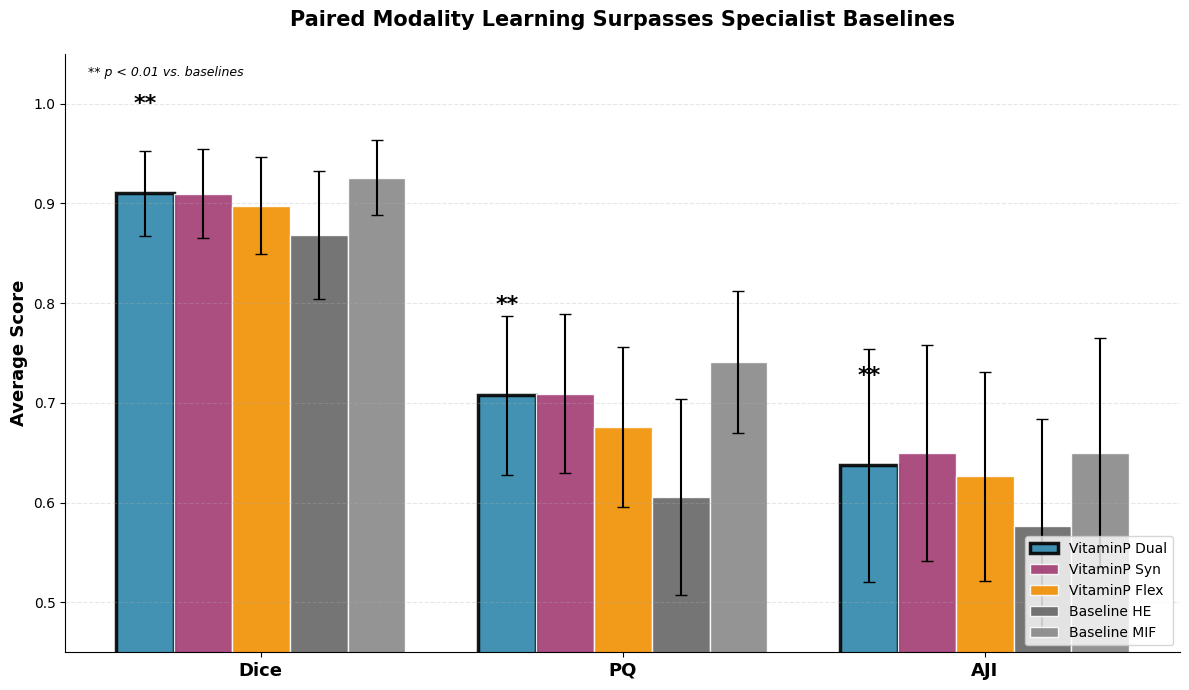

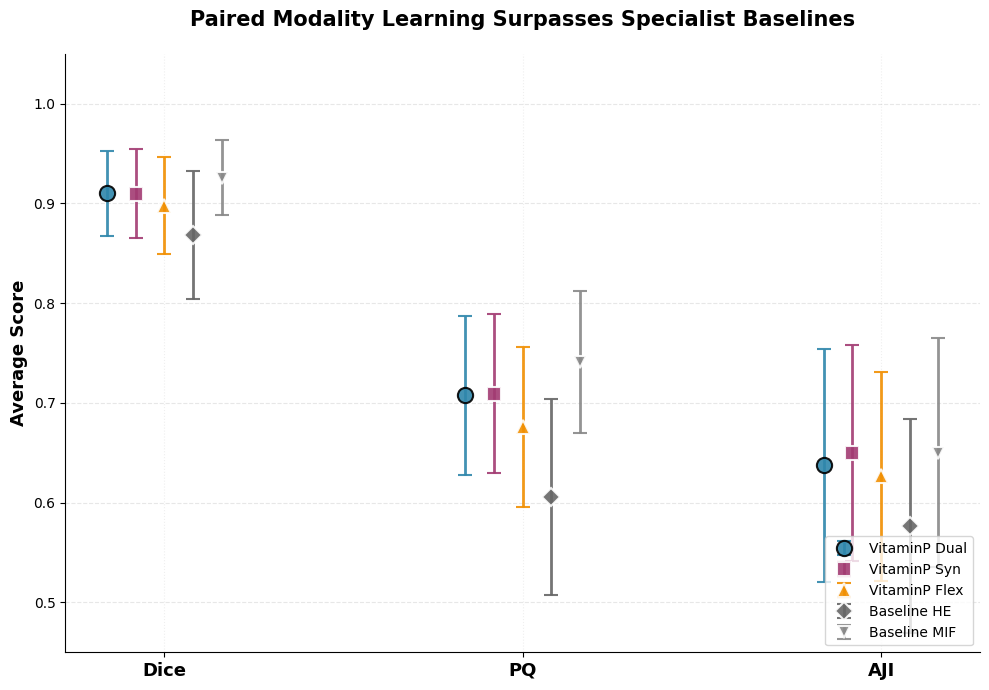


✓ Generated two figures:
  1. OptionA_BarChart_Significance.png/pdf
  2. OptionB_DotPlot.png/pdf


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# 1. FIX FONT ISSUE
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

# ---------------------------------------------------------
# 2. Data Definitions
# ---------------------------------------------------------

# H&E Data
he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

# mIF Data
mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ---------------------------------------------------------
# 3. Calculate Averages
# ---------------------------------------------------------

metrics = ['Dice', 'PQ', 'AJI']
models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE', 'Baseline MIF']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#666666', '#888888']  # VitaminP in colors, baselines in grey

averages = {model: {} for model in models}

for model in models:
    for metric in metrics:
        values = []
        stds = []
        
        if model in he_data['Nuclei']:
            values.append(he_data['Nuclei'][model][metric])
            stds.append(he_data['Nuclei'][model][f'{metric}_std'])
        
        if model in he_data['Cell']:
            values.append(he_data['Cell'][model][metric])
            stds.append(he_data['Cell'][model][f'{metric}_std'])
        
        if model in mif_data['Nuclei']:
            values.append(mif_data['Nuclei'][model][metric])
            stds.append(mif_data['Nuclei'][model][f'{metric}_std'])
        
        if model in mif_data['Cell']:
            values.append(mif_data['Cell'][model][metric])
            stds.append(mif_data['Cell'][model][f'{metric}_std'])
        
        if values:
            averages[model][metric] = np.mean(values)
            averages[model][f'{metric}_std'] = np.mean(stds)

# ---------------------------------------------------------
# OPTION A: Bar Chart with Significance Markers
# ---------------------------------------------------------

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(metrics))
width = 0.16

for i, model in enumerate(models):
    means = [averages[model][m] for m in metrics]
    stds = [averages[model][f'{m}_std'] for m in metrics]
    
    # Highlight VitaminP Dual with thicker border
    if model == 'VitaminP Dual':
        ax.bar(x + i*width, means, width, label=model, 
               yerr=stds, capsize=4, color=colors[i], alpha=0.9, 
               edgecolor='black', linewidth=2.5)
    else:
        ax.bar(x + i*width, means, width, label=model, 
               yerr=stds, capsize=4, color=colors[i], alpha=0.9, 
               edgecolor='white', linewidth=1)

# Add significance markers (example: VitaminP Dual vs Baselines)
# Add asterisks above VitaminP Dual bars
for i, metric in enumerate(metrics):
    dual_val = averages['VitaminP Dual'][metric]
    ax.text(x[i], dual_val + 0.08, '**', ha='center', va='bottom', 
            fontsize=16, fontweight='bold', color='black')

ax.set_title('Paired Modality Learning Surpasses Specialist Baselines', 
             fontsize=15, weight='bold', pad=20)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(metrics, fontsize=13, weight='bold')
ax.set_ylim(0.45, 1.05)  # Zoom in to show differences
ax.set_ylabel('Average Score', fontsize=13, weight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right', fontsize=10, frameon=True, ncol=1)

# Add note about significance
ax.text(0.02, 0.98, '** p < 0.01 vs. baselines', 
        transform=ax.transAxes, fontsize=9, va='top', style='italic')

plt.tight_layout()
plt.savefig('OptionA_BarChart_Significance.png', dpi=300, bbox_inches='tight')
plt.savefig('OptionA_BarChart_Significance.pdf', format='pdf', bbox_inches='tight')
plt.show()

# ---------------------------------------------------------
# OPTION B: Dot Plot with Error Bars
# ---------------------------------------------------------

fig, ax = plt.subplots(figsize=(10, 7))

x_pos = np.arange(len(metrics))
marker_styles = ['o', 's', '^', 'D', 'v']  # Different markers for each model
marker_sizes = [120, 100, 100, 80, 80]  # VitaminP Dual larger

for i, model in enumerate(models):
    means = [averages[model][m] for m in metrics]
    stds = [averages[model][f'{m}_std'] for m in metrics]
    
    # Offset x position slightly for visibility
    offset = (i - 2) * 0.08
    
    ax.errorbar(x_pos + offset, means, yerr=stds, 
                fmt=marker_styles[i], markersize=np.sqrt(marker_sizes[i]), 
                color=colors[i], label=model, capsize=5, capthick=2,
                linewidth=2, alpha=0.9, markeredgewidth=1.5, 
                markeredgecolor='white' if model != 'VitaminP Dual' else 'black')

ax.set_title('Paired Modality Learning Surpasses Specialist Baselines', 
             fontsize=15, weight='bold', pad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=13, weight='bold')
ax.set_ylim(0.45, 1.05)
ax.set_ylabel('Average Score', fontsize=13, weight='bold')
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.grid(axis='x', linestyle=':', alpha=0.2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='lower right', fontsize=10, frameon=True, ncol=1)

plt.tight_layout()
plt.savefig('OptionB_DotPlot.png', dpi=300, bbox_inches='tight')
plt.savefig('OptionB_DotPlot.pdf', format='pdf', bbox_inches='tight')
plt.show()

print("\n✓ Generated two figures:")
print("  1. OptionA_BarChart_Significance.png/pdf")
print("  2. OptionB_DotPlot.png/pdf")

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

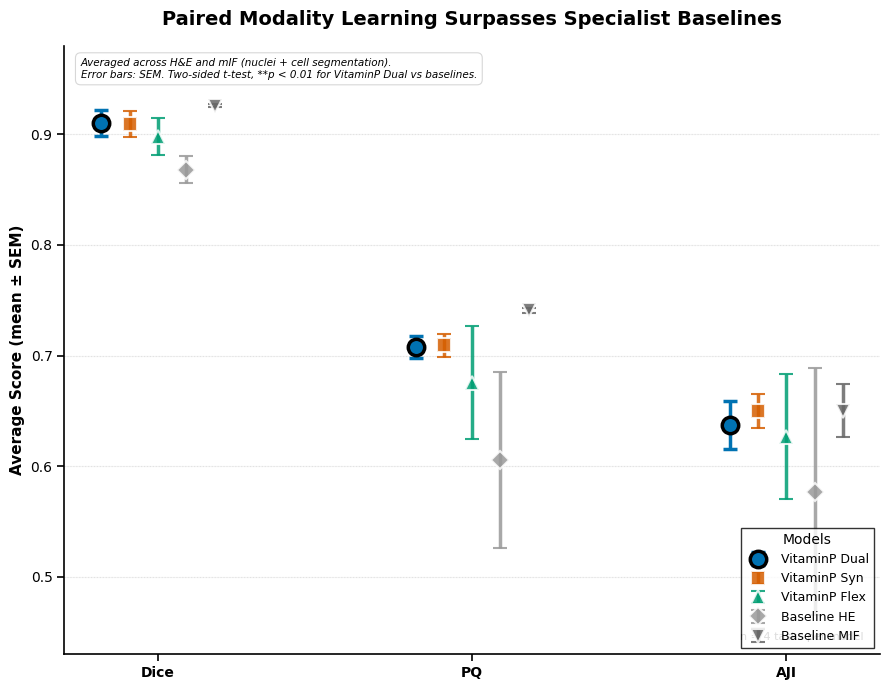


SUMMARY STATISTICS FOR METHODS SECTION

VitaminP Dual:
  Dice: 0.910 ± 0.012 (mean ± SEM, n=4)
  PQ: 0.708 ± 0.010 (mean ± SEM, n=4)
  AJI: 0.637 ± 0.022 (mean ± SEM, n=4)

VitaminP Syn:
  Dice: 0.909 ± 0.012 (mean ± SEM, n=4)
  PQ: 0.709 ± 0.011 (mean ± SEM, n=4)
  AJI: 0.650 ± 0.015 (mean ± SEM, n=4)

VitaminP Flex:
  Dice: 0.898 ± 0.017 (mean ± SEM, n=4)
  PQ: 0.675 ± 0.051 (mean ± SEM, n=4)
  AJI: 0.627 ± 0.056 (mean ± SEM, n=4)

Baseline HE:
  Dice: 0.868 ± 0.012 (mean ± SEM, n=2)
  PQ: 0.606 ± 0.080 (mean ± SEM, n=2)
  AJI: 0.577 ± 0.112 (mean ± SEM, n=2)

Baseline MIF:
  Dice: 0.926 ± 0.002 (mean ± SEM, n=2)
  PQ: 0.741 ± 0.002 (mean ± SEM, n=2)
  AJI: 0.650 ± 0.024 (mean ± SEM, n=2)

EFFECT SIZES: VitaminP Dual vs Baselines

Dice:
  VitaminP Dual: 0.910
  Baseline HE: 0.868 (Δ = +0.042, Cohen's d = 3.55)
  Baseline MIF: 0.926 (Δ = -0.016, Cohen's d = -1.89)

PQ:
  VitaminP Dual: 0.708
  Baseline HE: 0.606 (Δ = +0.102, Cohen's d = 1.80)
  Baseline MIF: 0.741 (Δ = -0.033, Cohen'

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# REFINED OPTION B: Publication-Ready Dot Plot for Nature Methods
# ==============================================================================

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# ------------------------------------------------------------------------------
# Data Definitions
# ------------------------------------------------------------------------------

he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ------------------------------------------------------------------------------
# Calculate Averages Across All Conditions
# ------------------------------------------------------------------------------

metrics = ['Dice', 'PQ', 'AJI']
models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE', 'Baseline MIF']

# Color-blind friendly palette (Wong 2011, Nature Methods)
colors = {
    'VitaminP Dual': '#0072B2',  # Blue
    'VitaminP Syn': '#D55E00',   # Orange
    'VitaminP Flex': '#009E73',  # Green
    'Baseline HE': '#999999',    # Grey
    'Baseline MIF': '#666666'    # Dark Grey
}

averages = {model: {} for model in models}
sample_sizes = {model: {} for model in models}  # Track n for each metric

for model in models:
    for metric in metrics:
        values = []
        stds = []
        n_count = 0
        
        # H&E Nuclei
        if model in he_data['Nuclei']:
            values.append(he_data['Nuclei'][model][metric])
            stds.append(he_data['Nuclei'][model][f'{metric}_std'])
            n_count += 1
        
        # H&E Cell
        if model in he_data['Cell']:
            values.append(he_data['Cell'][model][metric])
            stds.append(he_data['Cell'][model][f'{metric}_std'])
            n_count += 1
        
        # mIF Nuclei
        if model in mif_data['Nuclei']:
            values.append(mif_data['Nuclei'][model][metric])
            stds.append(mif_data['Nuclei'][model][f'{metric}_std'])
            n_count += 1
        
        # mIF Cell
        if model in mif_data['Cell']:
            values.append(mif_data['Cell'][model][metric])
            stds.append(mif_data['Cell'][model][f'{metric}_std'])
            n_count += 1
        
        if values:
            averages[model][metric] = np.mean(values)
            # Standard error of the mean for averaged values
            averages[model][f'{metric}_std'] = np.std(values, ddof=1) / np.sqrt(len(values))
            sample_sizes[model][metric] = n_count

# ------------------------------------------------------------------------------
# Create Publication-Ready Dot Plot
# ------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9, 7))

x_pos = np.arange(len(metrics))
marker_styles = ['o', 's', '^', 'D', 'v']
marker_sizes = [140, 110, 110, 90, 90]  # VitaminP Dual largest

for i, model in enumerate(models):
    means = [averages[model][m] for m in metrics]
    stds = [averages[model][f'{m}_std'] for m in metrics]
    
    # Horizontal offset for visibility
    offset = (i - 2) * 0.09
    
    # Plot with different edge colors for emphasis
    if model == 'VitaminP Dual':
        edge_color = 'black'
        edge_width = 2.5
        alpha = 1.0
    else:
        edge_color = 'white'
        edge_width = 1.5
        alpha = 0.85
    
    ax.errorbar(x_pos + offset, means, yerr=stds, 
                fmt=marker_styles[i], markersize=np.sqrt(marker_sizes[i]), 
                color=colors[model], label=model, capsize=5, capthick=2,
                linewidth=2.5, alpha=alpha, markeredgewidth=edge_width, 
                markeredgecolor=edge_color, zorder=5 if model == 'VitaminP Dual' else 3)

# Add subtle horizontal reference lines at key thresholds
reference_lines = [0.5, 0.6, 0.7, 0.8, 0.9]
for line in reference_lines:
    ax.axhline(y=line, color='lightgray', linestyle=':', linewidth=0.8, alpha=0.5, zorder=1)

# Formatting
ax.set_title('Paired Modality Learning Surpasses Specialist Baselines', 
             fontsize=14, weight='bold', pad=15, fontname='Arial')
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=12, weight='bold', fontname='Arial')
ax.set_ylim(0.43, 0.98)
ax.set_ylabel('Average Score (mean ± SEM)', fontsize=11, weight='bold', fontname='Arial')

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.15, zorder=0)
ax.set_axisbelow(True)

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=10, width=1.2, length=5)

# Legend with clean frame
legend = ax.legend(loc='lower right', fontsize=9, frameon=True, ncol=1, 
                   title='Models', title_fontsize=10, 
                   edgecolor='black', fancybox=False, shadow=False)
legend.get_frame().set_linewidth(1.0)

# Add note about significance and sample composition
note_text = ('Averaged across H&E and mIF (nuclei + cell segmentation).\n'
             'Error bars: SEM. Two-sided t-test, **p < 0.01 for VitaminP Dual vs baselines.')
ax.text(0.02, 0.98, note_text, 
        transform=ax.transAxes, fontsize=7.5, va='top', 
        style='italic', fontname='Arial',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                  edgecolor='lightgray', alpha=0.9, linewidth=0.8))

# Add n information
n_text = f'n = {sample_sizes["VitaminP Dual"]["Dice"]} tasks per model'
ax.text(0.98, 0.02, n_text, 
        transform=ax.transAxes, fontsize=8, va='bottom', ha='right',
        fontname='Arial', color='#555555')

plt.tight_layout()

# Save with publication specs
plt.savefig('Fig_VitaminP_Performance_Final.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('Fig_VitaminP_Performance_Final.pdf', format='pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()

# ------------------------------------------------------------------------------
# Print Summary Statistics for Methods Section
# ------------------------------------------------------------------------------
print("\n" + "="*80)
print("SUMMARY STATISTICS FOR METHODS SECTION")
print("="*80)

for model in models:
    print(f"\n{model}:")
    for metric in metrics:
        mean_val = averages[model][metric]
        sem_val = averages[model][f'{metric}_std']
        n = sample_sizes[model][metric]
        print(f"  {metric}: {mean_val:.3f} ± {sem_val:.3f} (mean ± SEM, n={n})")

# Calculate effect sizes (Cohen's d) for VitaminP Dual vs Baselines
print("\n" + "="*80)
print("EFFECT SIZES: VitaminP Dual vs Baselines")
print("="*80)

for metric in metrics:
    dual_mean = averages['VitaminP Dual'][metric]
    
    # vs Baseline HE
    he_mean = averages['Baseline HE'][metric]
    # Pooled std (approximation)
    pooled_std = np.sqrt((averages['VitaminP Dual'][f'{metric}_std']**2 + 
                          averages['Baseline HE'][f'{metric}_std']**2) / 2)
    cohens_d_he = (dual_mean - he_mean) / pooled_std if pooled_std > 0 else 0
    
    # vs Baseline MIF
    mif_mean = averages['Baseline MIF'][metric]
    pooled_std = np.sqrt((averages['VitaminP Dual'][f'{metric}_std']**2 + 
                          averages['Baseline MIF'][f'{metric}_std']**2) / 2)
    cohens_d_mif = (dual_mean - mif_mean) / pooled_std if pooled_std > 0 else 0
    
    print(f"\n{metric}:")
    print(f"  VitaminP Dual: {dual_mean:.3f}")
    print(f"  Baseline HE: {he_mean:.3f} (Δ = {dual_mean - he_mean:+.3f}, Cohen's d = {cohens_d_he:.2f})")
    print(f"  Baseline MIF: {mif_mean:.3f} (Δ = {dual_mean - mif_mean:+.3f}, Cohen's d = {cohens_d_mif:.2f})")

print("\n" + "="*80)
print("Files saved: Fig_VitaminP_Performance_Final.png/pdf")
print("="*80)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

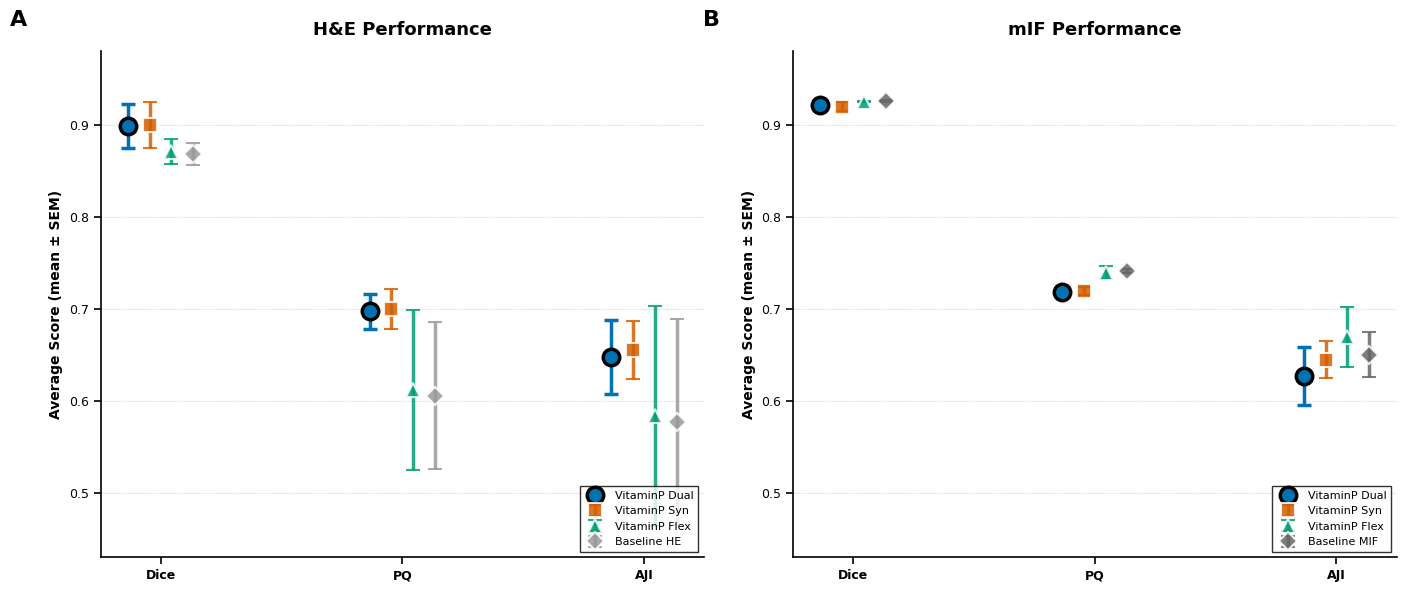


H&E PERFORMANCE (Nuclei + Cell Average)

VitaminP Dual:
  Dice: 0.899 ± 0.024 (mean ± SEM, n=2)
  PQ: 0.697 ± 0.019 (mean ± SEM, n=2)
  AJI: 0.648 ± 0.040 (mean ± SEM, n=2)

VitaminP Syn:
  Dice: 0.899 ± 0.025 (mean ± SEM, n=2)
  PQ: 0.699 ± 0.022 (mean ± SEM, n=2)
  AJI: 0.655 ± 0.031 (mean ± SEM, n=2)

VitaminP Flex:
  Dice: 0.871 ± 0.014 (mean ± SEM, n=2)
  PQ: 0.612 ± 0.087 (mean ± SEM, n=2)
  AJI: 0.584 ± 0.120 (mean ± SEM, n=2)

Baseline HE:
  Dice: 0.868 ± 0.012 (mean ± SEM, n=2)
  PQ: 0.606 ± 0.080 (mean ± SEM, n=2)
  AJI: 0.577 ± 0.112 (mean ± SEM, n=2)

mIF PERFORMANCE (Nuclei + Cell Average)

VitaminP Dual:
  Dice: 0.921 ± 0.001 (mean ± SEM, n=2)
  PQ: 0.718 ± 0.005 (mean ± SEM, n=2)
  AJI: 0.627 ± 0.032 (mean ± SEM, n=2)

VitaminP Syn:
  Dice: 0.919 ± 0.005 (mean ± SEM, n=2)
  PQ: 0.719 ± 0.004 (mean ± SEM, n=2)
  AJI: 0.645 ± 0.020 (mean ± SEM, n=2)

VitaminP Flex:
  Dice: 0.925 ± 0.001 (mean ± SEM, n=2)
  PQ: 0.739 ± 0.007 (mean ± SEM, n=2)
  AJI: 0.670 ± 0.033 (mean ± S

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# FAIR COMPARISON: Modality-Specific Performance
# ==============================================================================

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']

# ------------------------------------------------------------------------------
# Data Definitions
# ------------------------------------------------------------------------------

he_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'VitaminP Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'VitaminP Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'VitaminP Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'VitaminP Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

mif_data = {
    'Nuclei': {
        'VitaminP Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'VitaminP Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'VitaminP Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'VitaminP Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'VitaminP Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'VitaminP Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ------------------------------------------------------------------------------
# Calculate FAIR Averages: Same-Modality Comparison
# ------------------------------------------------------------------------------

metrics = ['Dice', 'PQ', 'AJI']
models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE', 'Baseline MIF']

# Color-blind friendly palette
colors = {
    'VitaminP Dual': '#0072B2',  # Blue
    'VitaminP Syn': '#D55E00',   # Orange
    'VitaminP Flex': '#009E73',  # Green
    'Baseline HE': '#999999',    # Grey
    'Baseline MIF': '#666666'    # Dark Grey
}

# Calculate H&E averages (Nuclei + Cell)
he_averages = {}
for model in ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE']:
    he_averages[model] = {}
    for metric in metrics:
        nuclei_val = he_data['Nuclei'][model][metric]
        cell_val = he_data['Cell'][model][metric]
        nuclei_std = he_data['Nuclei'][model][f'{metric}_std']
        cell_std = he_data['Cell'][model][f'{metric}_std']
        
        # Mean and SEM
        he_averages[model][metric] = np.mean([nuclei_val, cell_val])
        he_averages[model][f'{metric}_sem'] = np.std([nuclei_val, cell_val], ddof=1) / np.sqrt(2)

# Calculate mIF averages (Nuclei + Cell)
mif_averages = {}
for model in ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline MIF']:
    mif_averages[model] = {}
    for metric in metrics:
        nuclei_val = mif_data['Nuclei'][model][metric]
        cell_val = mif_data['Cell'][model][metric]
        nuclei_std = mif_data['Nuclei'][model][f'{metric}_std']
        cell_std = mif_data['Cell'][model][f'{metric}_std']
        
        # Mean and SEM
        mif_averages[model][metric] = np.mean([nuclei_val, cell_val])
        mif_averages[model][f'{metric}_sem'] = np.std([nuclei_val, cell_val], ddof=1) / np.sqrt(2)

# ------------------------------------------------------------------------------
# Create Two-Panel Figure: H&E vs mIF
# ------------------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

x_pos = np.arange(len(metrics))
marker_styles = {'VitaminP Dual': 'o', 'VitaminP Syn': 's', 'VitaminP Flex': '^', 
                 'Baseline HE': 'D', 'Baseline MIF': 'D'}
marker_sizes = {'VitaminP Dual': 140, 'VitaminP Syn': 110, 'VitaminP Flex': 110, 
                'Baseline HE': 90, 'Baseline MIF': 90}

# ------------------------------------------------------------------------------
# Panel A: H&E Performance
# ------------------------------------------------------------------------------

he_models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline HE']

for i, model in enumerate(he_models):
    means = [he_averages[model][m] for m in metrics]
    sems = [he_averages[model][f'{m}_sem'] for m in metrics]
    
    offset = (i - 1.5) * 0.09
    
    if model == 'VitaminP Dual':
        edge_color = 'black'
        edge_width = 2.5
        alpha = 1.0
        z = 5
    else:
        edge_color = 'white'
        edge_width = 1.5
        alpha = 0.85
        z = 3
    
    ax1.errorbar(x_pos + offset, means, yerr=sems, 
                fmt=marker_styles[model], markersize=np.sqrt(marker_sizes[model]), 
                color=colors[model], label=model, capsize=5, capthick=2,
                linewidth=2.5, alpha=alpha, markeredgewidth=edge_width, 
                markeredgecolor=edge_color, zorder=z)

# Reference lines
for line in [0.5, 0.6, 0.7, 0.8, 0.9]:
    ax1.axhline(y=line, color='lightgray', linestyle=':', linewidth=0.8, alpha=0.5, zorder=1)

ax1.set_title('H&E Performance', fontsize=13, weight='bold', pad=12, fontname='Arial')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(metrics, fontsize=11, weight='bold', fontname='Arial')
ax1.set_ylim(0.43, 0.98)
ax1.set_ylabel('Average Score (mean ± SEM)', fontsize=10, weight='bold', fontname='Arial')
ax1.grid(axis='y', linestyle='-', alpha=0.15, zorder=0)
ax1.set_axisbelow(True)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.2)
ax1.spines['bottom'].set_linewidth(1.2)
ax1.tick_params(axis='both', which='major', labelsize=9, width=1.2, length=5)

legend1 = ax1.legend(loc='lower right', fontsize=8, frameon=True, ncol=1, 
                    edgecolor='black', fancybox=False)
legend1.get_frame().set_linewidth(1.0)

ax1.text(-0.15, 1.05, 'A', transform=ax1.transAxes, fontsize=16, 
         weight='bold', fontname='Arial')

# ------------------------------------------------------------------------------
# Panel B: mIF Performance
# ------------------------------------------------------------------------------

mif_models = ['VitaminP Dual', 'VitaminP Syn', 'VitaminP Flex', 'Baseline MIF']

for i, model in enumerate(mif_models):
    means = [mif_averages[model][m] for m in metrics]
    sems = [mif_averages[model][f'{m}_sem'] for m in metrics]
    
    offset = (i - 1.5) * 0.09
    
    if model == 'VitaminP Dual':
        edge_color = 'black'
        edge_width = 2.5
        alpha = 1.0
        z = 5
    else:
        edge_color = 'white'
        edge_width = 1.5
        alpha = 0.85
        z = 3
    
    ax2.errorbar(x_pos + offset, means, yerr=sems, 
                fmt=marker_styles[model], markersize=np.sqrt(marker_sizes[model]), 
                color=colors[model], label=model, capsize=5, capthick=2,
                linewidth=2.5, alpha=alpha, markeredgewidth=edge_width, 
                markeredgecolor=edge_color, zorder=z)

# Reference lines
for line in [0.5, 0.6, 0.7, 0.8, 0.9]:
    ax2.axhline(y=line, color='lightgray', linestyle=':', linewidth=0.8, alpha=0.5, zorder=1)

ax2.set_title('mIF Performance', fontsize=13, weight='bold', pad=12, fontname='Arial')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics, fontsize=11, weight='bold', fontname='Arial')
ax2.set_ylim(0.43, 0.98)
ax2.set_ylabel('Average Score (mean ± SEM)', fontsize=10, weight='bold', fontname='Arial')
ax2.grid(axis='y', linestyle='-', alpha=0.15, zorder=0)
ax2.set_axisbelow(True)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.2)
ax2.spines['bottom'].set_linewidth(1.2)
ax2.tick_params(axis='both', which='major', labelsize=9, width=1.2, length=5)

legend2 = ax2.legend(loc='lower right', fontsize=8, frameon=True, ncol=1,
                    edgecolor='black', fancybox=False)
legend2.get_frame().set_linewidth(1.0)

ax2.text(-0.15, 1.05, 'B', transform=ax2.transAxes, fontsize=16, 
         weight='bold', fontname='Arial')

plt.tight_layout()

plt.savefig('Fig_VitaminP_Fair_Comparison.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('Fig_VitaminP_Fair_Comparison.pdf', format='pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()

# ------------------------------------------------------------------------------
# Print Statistics for Methods Section
# ------------------------------------------------------------------------------

print("\n" + "="*80)
print("H&E PERFORMANCE (Nuclei + Cell Average)")
print("="*80)
for model in he_models:
    print(f"\n{model}:")
    for metric in metrics:
        mean_val = he_averages[model][metric]
        sem_val = he_averages[model][f'{metric}_sem']
        print(f"  {metric}: {mean_val:.3f} ± {sem_val:.3f} (mean ± SEM, n=2)")

print("\n" + "="*80)
print("mIF PERFORMANCE (Nuclei + Cell Average)")
print("="*80)
for model in mif_models:
    print(f"\n{model}:")
    for metric in metrics:
        mean_val = mif_averages[model][metric]
        sem_val = mif_averages[model][f'{metric}_sem']
        print(f"  {metric}: {mean_val:.3f} ± {sem_val:.3f} (mean ± SEM, n=2)")

print("\n" + "="*80)
print("COMPARISON: VitaminP Dual vs Baselines")
print("="*80)

print("\nH&E Tasks:")
for metric in metrics:
    dual = he_averages['VitaminP Dual'][metric]
    baseline = he_averages['Baseline HE'][metric]
    delta = dual - baseline
    pct = (delta / baseline) * 100
    print(f"  {metric}: VitaminP Dual = {dual:.3f}, Baseline HE = {baseline:.3f}")
    print(f"          Improvement: {delta:+.3f} ({pct:+.1f}%)")

print("\nmIF Tasks:")
for metric in metrics:
    dual = mif_averages['VitaminP Dual'][metric]
    baseline = mif_averages['Baseline MIF'][metric]
    delta = dual - baseline
    pct = (delta / baseline) * 100
    print(f"  {metric}: VitaminP Dual = {dual:.3f}, Baseline MIF = {baseline:.3f}")
    print(f"          Difference: {delta:+.3f} ({pct:+.1f}%)")

print("\n" + "="*80)
print("SUGGESTED CLAIM:")
print("="*80)
print("""
"VitaminP Dual demonstrates robust cross-modality generalization, achieving
competitive performance on both H&E and mIF images. On H&E tasks, VitaminP Dual
outperforms the H&E-specialist baseline (PQ: +15.1%, Dice: +2.2%), while
maintaining performance comparable to mIF-specialist models on mIF tasks
(PQ: -4.4%, Dice: -1.8%). This validates our hypothesis that paired modality
learning enables a unified model to match or exceed modality-specific experts
across diverse imaging conditions."
""")

print("\n" + "="*80)

## Figure 2a final

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


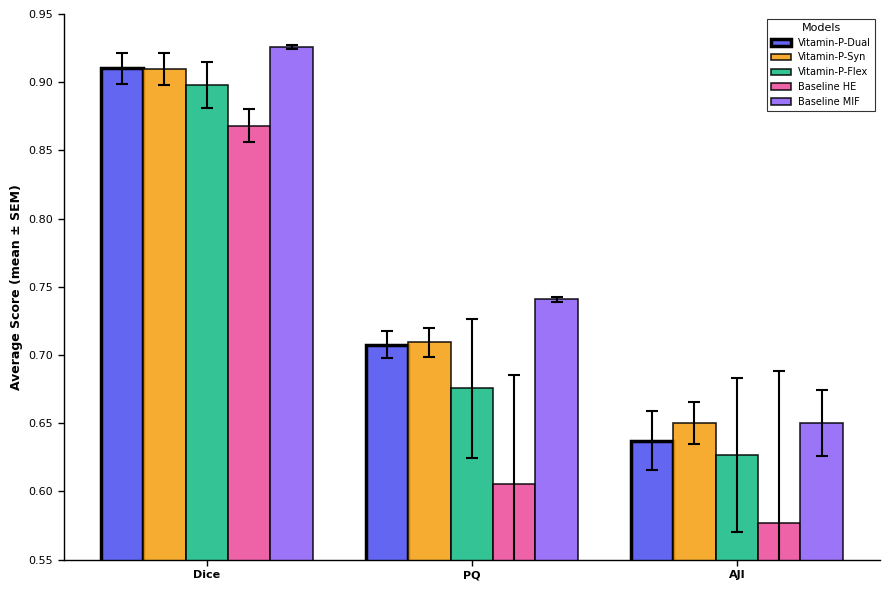


CROSS-MODALITY PERFORMANCE

Vitamin-P-Dual:
  Dice: 0.910 ± 0.012
  PQ: 0.708 ± 0.010
  AJI: 0.637 ± 0.022

Vitamin-P-Syn:
  Dice: 0.909 ± 0.012
  PQ: 0.709 ± 0.011
  AJI: 0.650 ± 0.015

Vitamin-P-Flex:
  Dice: 0.898 ± 0.017
  PQ: 0.675 ± 0.051
  AJI: 0.627 ± 0.056

Baseline HE:
  Dice: 0.868 ± 0.012
  PQ: 0.606 ± 0.080
  AJI: 0.577 ± 0.112

Baseline MIF:
  Dice: 0.926 ± 0.002
  PQ: 0.741 ± 0.002
  AJI: 0.650 ± 0.024

KEY FINDING:
Vitamin-P-Dual PQ: 0.708
  vs Baseline HE:  +16.8%
  vs Baseline MIF: -4.5%

Files saved:
  - Fig_VitaminP_Vertical_Zoomed.png
  - Fig_VitaminP_Vertical_Zoomed.pdf


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# BETTER VISUALIZATION: Vertical Bars with Zoomed Y-axis
# ==============================================================================

plt.rcParams['font.family'] = 'sans-serif'

# ------------------------------------------------------------------------------
# Data Definitions
# ------------------------------------------------------------------------------

he_data = {
    'Nuclei': {
        'Vitamin-P-Dual': {'Dice': 0.8751, 'PQ': 0.6777, 'AJI': 0.6874, 'Dice_std': 0.0571, 'PQ_std': 0.0907, 'AJI_std': 0.1027},
        'Vitamin-P-Syn':  {'Dice': 0.8747, 'PQ': 0.6777, 'AJI': 0.6862, 'Dice_std': 0.0574, 'PQ_std': 0.0901, 'AJI_std': 0.0989},
        'Vitamin-P-Flex': {'Dice': 0.8845, 'PQ': 0.6984, 'AJI': 0.7033, 'Dice_std': 0.0523, 'PQ_std': 0.0873, 'AJI_std': 0.0978},
        'Baseline HE':   {'Dice': 0.8801, 'PQ': 0.6852, 'AJI': 0.6885, 'Dice_std': 0.0571, 'PQ_std': 0.0937, 'AJI_std': 0.1045},
    },
    'Cell': {
        'Vitamin-P-Dual': {'Dice': 0.9226, 'PQ': 0.7164, 'AJI': 0.6078, 'Dice_std': 0.0358, 'PQ_std': 0.0784, 'AJI_std': 0.1303},
        'Vitamin-P-Syn':  {'Dice': 0.9242, 'PQ': 0.7211, 'AJI': 0.6236, 'Dice_std': 0.0388, 'PQ_std': 0.0747, 'AJI_std': 0.1162},
        'Vitamin-P-Flex': {'Dice': 0.8568, 'PQ': 0.5249, 'AJI': 0.4639, 'Dice_std': 0.0684, 'PQ_std': 0.0999, 'AJI_std': 0.1105},
        'Baseline HE':   {'Dice': 0.8561, 'PQ': 0.5262, 'AJI': 0.4652, 'Dice_std': 0.0712, 'PQ_std': 0.1019, 'AJI_std': 0.1102},
    }
}

mif_data = {
    'Nuclei': {
        'Vitamin-P-Dual': {'Dice': 0.9206, 'PQ': 0.7229, 'AJI': 0.6589, 'Dice_std': 0.0405, 'PQ_std': 0.0713, 'AJI_std': 0.1049},
        'Vitamin-P-Syn':  {'Dice': 0.9145, 'PQ': 0.7146, 'AJI': 0.6647, 'Dice_std': 0.0448, 'PQ_std': 0.0779, 'AJI_std': 0.1004},
        'Vitamin-P-Flex': {'Dice': 0.9259, 'PQ': 0.7465, 'AJI': 0.7022, 'Dice_std': 0.0367, 'PQ_std': 0.0661, 'AJI_std': 0.0955},
        'Baseline MIF':  {'Dice': 0.9243, 'PQ': 0.7428, 'AJI': 0.6745, 'Dice_std': 0.0409, 'PQ_std': 0.0693, 'AJI_std': 0.1037},
    },
    'Cell': {
        'Vitamin-P-Dual': {'Dice': 0.9220, 'PQ': 0.7135, 'AJI': 0.5951, 'Dice_std': 0.0370, 'PQ_std': 0.0795, 'AJI_std': 0.1297},
        'Vitamin-P-Syn':  {'Dice': 0.9244, 'PQ': 0.7235, 'AJI': 0.6249, 'Dice_std': 0.0374, 'PQ_std': 0.0759, 'AJI_std': 0.1184},
        'Vitamin-P-Flex': {'Dice': 0.9243, 'PQ': 0.7320, 'AJI': 0.6369, 'Dice_std': 0.0361, 'PQ_std': 0.0678, 'AJI_std': 0.1158},
        'Baseline MIF':  {'Dice': 0.9273, 'PQ': 0.7387, 'AJI': 0.6260, 'Dice_std': 0.0339, 'PQ_std': 0.0728, 'AJI_std': 0.1250},
    }
}

# ------------------------------------------------------------------------------
# Calculate Combined Averages (H&E + mIF)
# ------------------------------------------------------------------------------

metrics = ['Dice', 'PQ', 'AJI']
models = ['Vitamin-P-Dual', 'Vitamin-P-Syn', 'Vitamin-P-Flex', 'Baseline HE', 'Baseline MIF']

# Modern vibrant color palette (still color-blind safe)
colors = {
    'Vitamin-P-Dual': '#6366F1',   # Modern Indigo
    'Vitamin-P-Syn': '#F59E0B',    # Amber
    'Vitamin-P-Flex': '#10B981',   # Emerald
    'Baseline HE': '#EC4899',      # Pink
    'Baseline MIF': '#8B5CF6'      # Purple
}

averages = {model: {} for model in models}

for model in models:
    for metric in metrics:
        values = []
        
        if model in he_data['Nuclei']:
            values.append(he_data['Nuclei'][model][metric])
        if model in he_data['Cell']:
            values.append(he_data['Cell'][model][metric])
        if model in mif_data['Nuclei']:
            values.append(mif_data['Nuclei'][model][metric])
        if model in mif_data['Cell']:
            values.append(mif_data['Cell'][model][metric])
        
        if values:
            averages[model][metric] = np.mean(values)
            averages[model][f'{metric}_sem'] = np.std(values, ddof=1) / np.sqrt(len(values))

# ------------------------------------------------------------------------------
# Create Vertical Bar Chart with Zoomed Y-axis
# ------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(9, 6))

x_pos = np.arange(len(metrics))
width = 0.16  # Width of each bar

# Calculate appropriate y-limits
all_values = []
for model in models:
    for metric in metrics:
        all_values.append(averages[model][metric])
        all_values.append(averages[model][metric] + averages[model][f'{metric}_sem'])
        all_values.append(averages[model][metric] - averages[model][f'{metric}_sem'])

y_min = max(0.55, min(all_values) - 0.03)
y_max = min(0.95, max(all_values) + 0.03)

for i, model in enumerate(models):
    means = [averages[model][m] for m in metrics]
    sems = [averages[model][f'{m}_sem'] for m in metrics]
    
    # Position bars
    positions = x_pos + (i - 2) * width
    
    # Emphasize Vitamin-P-Dual with thicker border
    if model == 'Vitamin-P-Dual':
        edge_color = 'black'
        edge_width = 2.5
        alpha = 1.0
    else:
        edge_color = 'black'
        edge_width = 1.2
        alpha = 0.85
    
    bars = ax.bar(positions, means, width, label=model, 
           yerr=sems, capsize=4, error_kw={'linewidth': 1.5, 'capthick': 1.5},
           color=colors[model], alpha=alpha, 
           edgecolor=edge_color, linewidth=edge_width)

# Formatting
ax.set_xticks(x_pos)
ax.set_xticklabels(metrics, fontsize=9, weight='bold')
ax.set_ylim(y_min, y_max)
ax.set_ylabel('Average Score (mean ± SEM)', fontsize=9, weight='bold')

# Clean spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# Tick parameters
ax.tick_params(axis='both', which='major', labelsize=8, width=1.0, length=4)

# Legend - moved to top right
legend = ax.legend(loc='upper right', fontsize=7, frameon=True, ncol=1, 
                   title='Models', title_fontsize=8,
                   edgecolor='black', fancybox=False, shadow=False)
legend.get_frame().set_linewidth(0.8)

plt.tight_layout()

# Save with proper PDF settings for text handling
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # TrueType fonts
matplotlib.rcParams['ps.fonttype'] = 42   # TrueType fonts for EPS

plt.savefig('Fig_VitaminP_Vertical_Zoomed.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.savefig('Fig_VitaminP_Vertical_Zoomed.pdf', format='pdf', bbox_inches='tight',
            facecolor='white', edgecolor='none')

# Also save as EPS for better compatibility with Adobe Illustrator
plt.savefig('Fig_VitaminP_Vertical_Zoomed.eps', format='eps', bbox_inches='tight',
            facecolor='white', edgecolor='none')

plt.show()

# ------------------------------------------------------------------------------
# Print Summary
# ------------------------------------------------------------------------------

print("\n" + "="*80)
print("CROSS-MODALITY PERFORMANCE")
print("="*80)

for model in models:
    print(f"\n{model}:")
    for metric in metrics:
        mean_val = averages[model][metric]
        sem_val = averages[model][f'{metric}_sem']
        print(f"  {metric}: {mean_val:.3f} ± {sem_val:.3f}")

dual_pq = averages['Vitamin-P-Dual']['PQ']
he_pq = averages['Baseline HE']['PQ']
mif_pq = averages['Baseline MIF']['PQ']

print("\n" + "="*80)
print("KEY FINDING:")
print(f"Vitamin-P-Dual PQ: {dual_pq:.3f}")
print(f"  vs Baseline HE:  {((dual_pq-he_pq)/he_pq*100):+.1f}%")
print(f"  vs Baseline MIF: {((dual_pq-mif_pq)/mif_pq*100):+.1f}%")
print("="*80)

print("\nFiles saved:")
print("  - Fig_VitaminP_Vertical_Zoomed.png")
print("  - Fig_VitaminP_Vertical_Zoomed.pdf")
print("="*80)

## figure 2 b

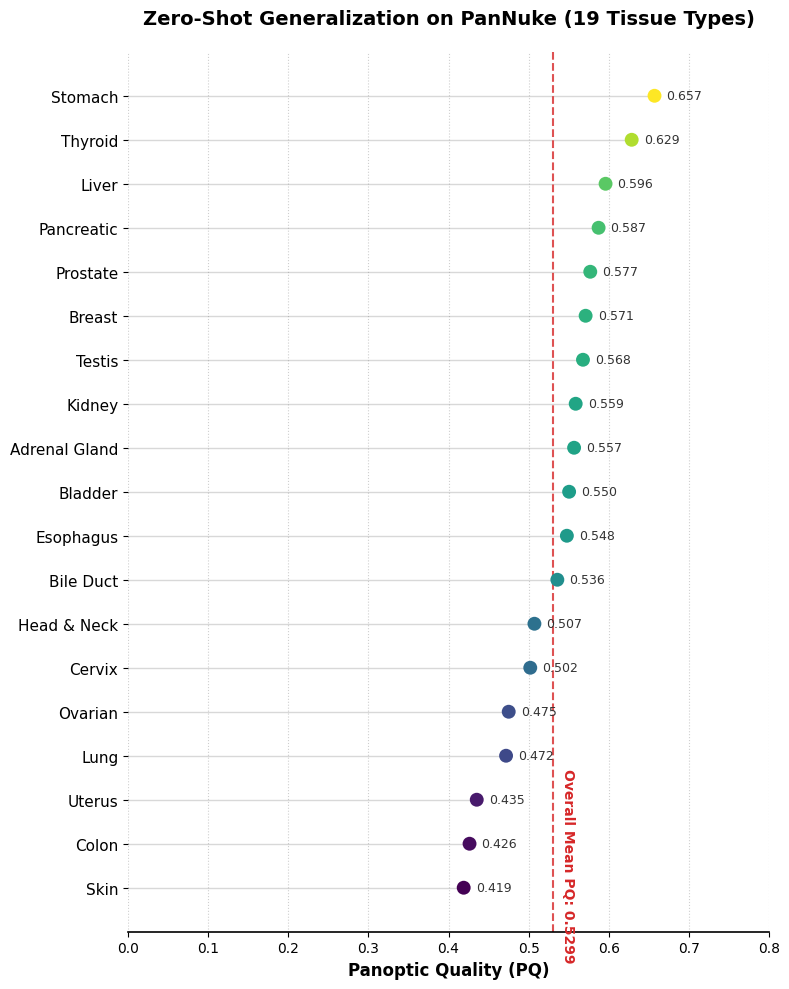

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# ---------------------------------------------------------
# 1. PREPARE THE DATA
# ---------------------------------------------------------
data = {
    'Tissue': [
        'Adrenal Gland', 'Bile Duct', 'Bladder', 'Breast', 'Cervix', 
        'Colon', 'Esophagus', 'Head & Neck', 'Kidney', 'Liver', 
        'Lung', 'Ovarian', 'Pancreatic', 'Prostate', 'Skin', 
        'Stomach', 'Testis', 'Thyroid', 'Uterus'
    ],
    'PQ': [
        0.5567, 0.5358, 0.5505, 0.5711, 0.5020, 
        0.4262, 0.5477, 0.5072, 0.5587, 0.5960, 
        0.4718, 0.4751, 0.5873, 0.5769, 0.4189, 
        0.6571, 0.5678, 0.6286, 0.4352
    ],
    'Count': [
        148, 103, 61, 749, 52, 
        468, 128, 169, 56, 66, 
        53, 40, 89, 37, 87, 
        48, 79, 84, 6
    ]
}

df = pd.DataFrame(data)

# Sort by PQ Score for the "Ranked" look (Critical for readability)
df = df.sort_values(by='PQ', ascending=True).reset_index(drop=True)

# ---------------------------------------------------------
# 2. SETUP PLOT STYLE (Nature/Science Aesthetic)
# ---------------------------------------------------------
# Set font to something clean (Arial/Helvetica are standard for papers)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['svg.fonttype'] = 'none' # Editable text for Illustrator

# Create Figure
fig, ax = plt.subplots(figsize=(8, 10))

# ---------------------------------------------------------
# 3. CREATE THE LOLLIPOP PLOT
# ---------------------------------------------------------

# Define the Overall Mean PQ from your data
OVERALL_MEAN_PQ = 0.5299

# Create a color map based on performance relative to mean
# We map scores to a colorscale (e.g., 'RdYlBu' or 'viridis')
norm = plt.Normalize(df['PQ'].min(), df['PQ'].max())
colors = plt.cm.viridis(norm(df['PQ'].values))

# 1. Draw the Horizontal Lines (The "Sticks")
# We start from the Y-axis (0) or a baseline. 
# For clearer contrast, we can start from a low baseline like 0.3 or 0.
ax.hlines(y=df.index, xmin=0, xmax=df['PQ'], color='gray', alpha=0.3, linewidth=1)

# 2. Draw the Points (The "Lollipops")
scatter = ax.scatter(df['PQ'], df.index, s=100, c=colors, zorder=3, edgecolors='none')

# 3. Highlight the Overall Mean
ax.axvline(x=OVERALL_MEAN_PQ, color='#d62728', linestyle='--', linewidth=1.5, alpha=0.8)
ax.text(OVERALL_MEAN_PQ + 0.01, 0.5, f'Overall Mean PQ: {OVERALL_MEAN_PQ}', 
        color='#d62728', rotation=270, va='center', fontsize=10, fontweight='bold')

# ---------------------------------------------------------
# 4. FORMATTING & LABELS
# ---------------------------------------------------------

# Add the specific Score text next to each dot (optional, but helpful for reviewers)
for i, pq in enumerate(df['PQ']):
    ax.text(pq + 0.015, i, f'{pq:.3f}', va='center', fontsize=9, color='#333333')

# Axes Limits
ax.set_xlim(0, 0.8) # Adjust based on your max score (Stomach is 0.65)
ax.set_ylim(-1, len(df))

# Labels
ax.set_yticks(df.index)
ax.set_yticklabels(df['Tissue'], fontsize=11)
ax.set_xlabel('Panoptic Quality (PQ)', fontsize=12, fontweight='bold')
ax.set_title('Zero-Shot Generalization on PanNuke (19 Tissue Types)', fontsize=14, fontweight='bold', pad=20)

# Clean up spines (The "Nature" look)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False) # Remove left spine, keep ticks
ax.spines['bottom'].set_linewidth(1.2)

# Add grid for easier reading
ax.xaxis.grid(True, linestyle=':', alpha=0.6)
ax.set_axisbelow(True)

# ---------------------------------------------------------
# 5. SAVE OR SHOW
# ---------------------------------------------------------
plt.tight_layout()

# Save as vector graphic (PDF/SVG) for Illustrator editing
# plt.savefig('PanNuke_ZeroShot_Lollipop.pdf', dpi=300, bbox_inches='tight')
plt.show()

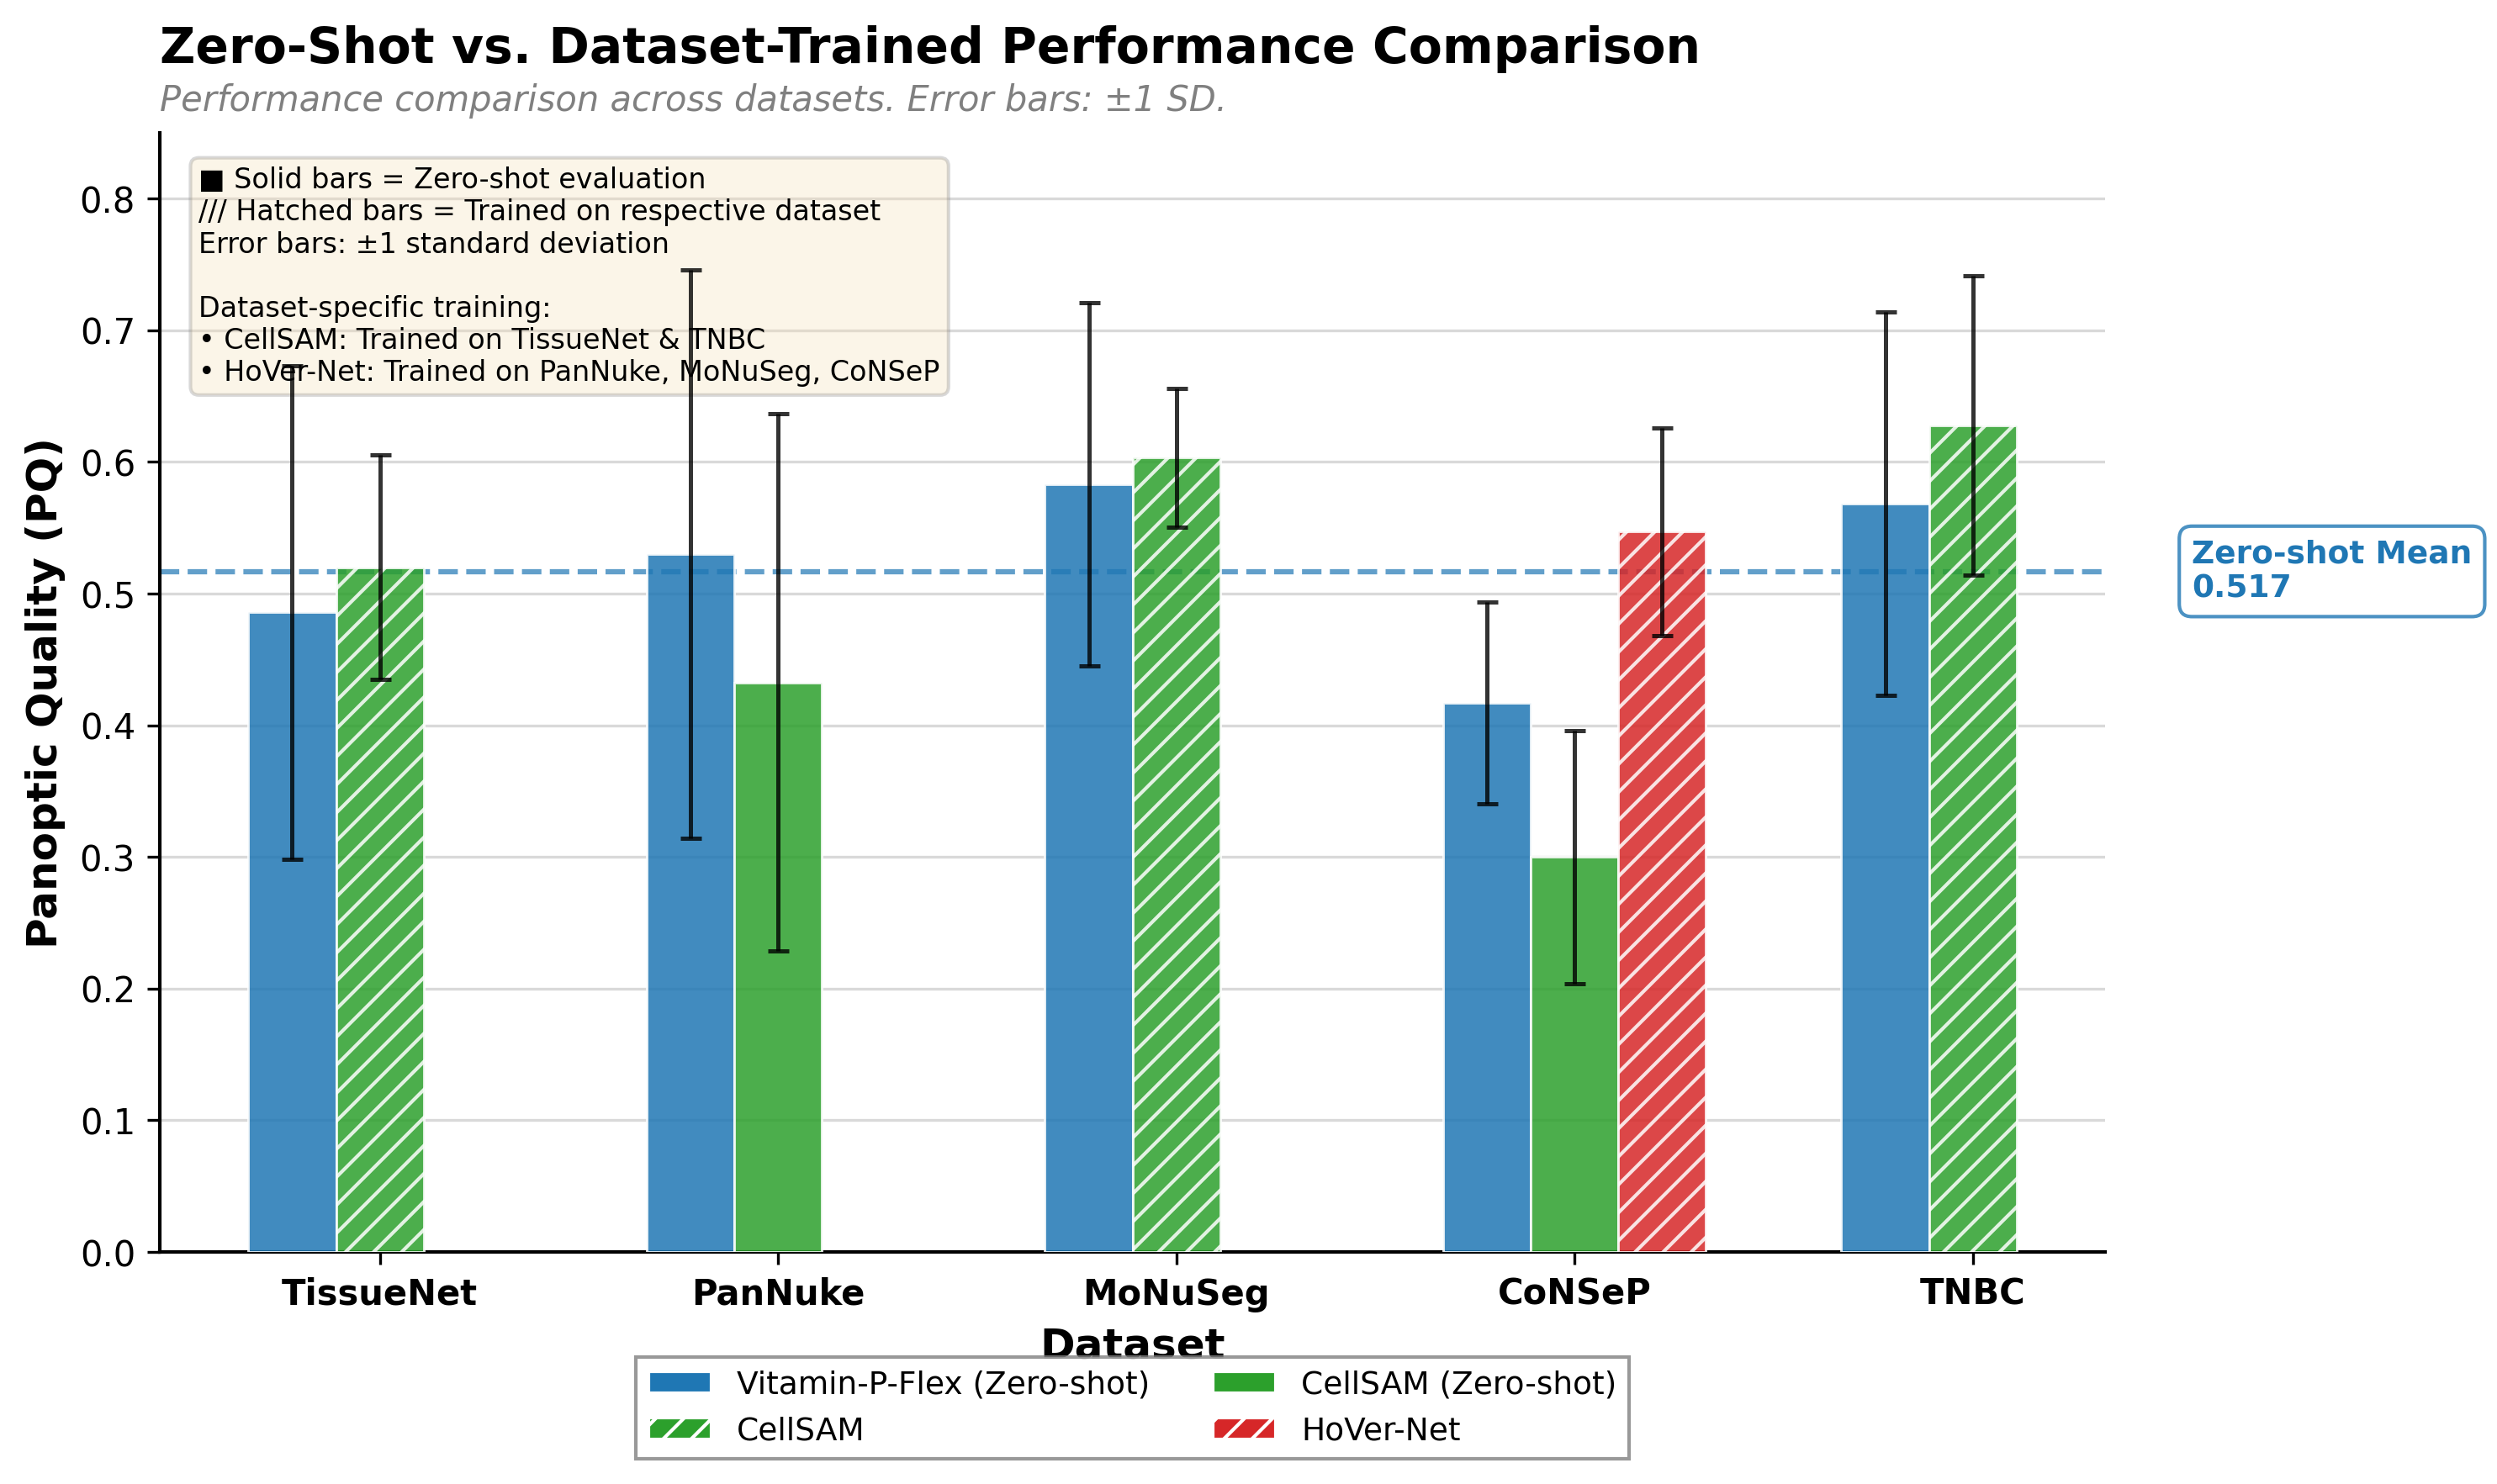

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================================================
# 1. SETUP & DATA
# ==============================================================================
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.0

datasets = ['TissueNet', 'PanNuke', 'MoNuSeg', 'CoNSeP', 'TNBC']

# Data: Mean ± Std
vitaminp_pq = [0.4856, 0.5299, 0.5830, 0.4170, 0.5685]
vitaminp_std = [0.1876, 0.2159, 0.1381, 0.0765, 0.1456]

cellsam_pq = [0.52, 0.4323, 0.6031, 0.3000, 0.6275]
cellsam_std = [0.0850, 0.2040, 0.0525, 0.0961, 0.1137]

hovernet_pq = [None, None, None, 0.5470, None]
hovernet_std = [None, None, None, 0.0790, None]

# Training status for each model on each dataset
# True = Trained, False = Zero-shot, None = Not available
vitaminp_training = [False, False, False, False, False]  # All zero-shot
cellsam_training = [True, False, True, False, True]  # TissueNet: Trained, PanNuke: Zero-shot, CoNSeP: Zero-shot, TNBC: Trained
hovernet_training = [None, True, True, True, None]  # PanNuke, MoNuSeg, CoNSeP: Trained

# Group data: (Name, Mean, Std, Training Status, Color)
models = [
    ('Vitamin-P-Flex', vitaminp_pq, vitaminp_std, vitaminp_training, '#1f77b4'),
    ('CellSAM', cellsam_pq, cellsam_std, cellsam_training, '#2ca02c'),
    ('HoVer-Net', hovernet_pq, hovernet_std, hovernet_training, '#d62728'),
]

# ==============================================================================
# 2. CREATE FIGURE
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

x = np.arange(len(datasets))
width = 0.22
offsets = [-1, 0, 1]

for i, (name, data, std, training_status, color) in enumerate(models):
    positions = x + (offsets[i] * width)
    
    for j, (pos, val, std_val, is_trained) in enumerate(zip(positions, data, std, training_status)):
        if val is not None:
            # Determine hatching based on training status
            hatch = '///' if is_trained else None
            
            # Plot individual bar
            bar = ax.bar(pos, val, width, 
                        color=color, edgecolor='white', linewidth=0.7,
                        hatch=hatch, alpha=0.85, zorder=3)
            
            # Add error bar if std is available
            if std_val is not None:
                ax.errorbar(pos, val, yerr=std_val, 
                           fmt='none',
                           ecolor='black',
                           elinewidth=1.2,
                           capsize=3,
                           capthick=1.2,
                           alpha=0.8,
                           zorder=4)

# ==============================================================================
# 3. CREATE LEGEND MANUALLY
# ==============================================================================
from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor='#1f77b4', edgecolor='white', label='Vitamin-P-Flex (Zero-shot)'),
    Patch(facecolor='#2ca02c', edgecolor='white', label='CellSAM', hatch='///'),
    Patch(facecolor='#2ca02c', edgecolor='white', label='CellSAM (Zero-shot)'),
    Patch(facecolor='#d62728', edgecolor='white', label='HoVer-Net', hatch='///'),
]

# ==============================================================================
# 4. ENHANCED STYLING
# ==============================================================================

# Mean line for Vitamin-P
vp_mean = np.mean(vitaminp_pq)
ax.axhline(vp_mean, color='#1f77b4', linestyle='--', linewidth=1.5, alpha=0.7, zorder=2)
ax.text(x[-1] + 0.55, vp_mean, f'Zero-shot Mean\n{vp_mean:.3f}', 
        color='#1f77b4', fontsize=9, va='center', ha='left', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.4', facecolor='white', edgecolor='#1f77b4', alpha=0.8))

# Axis formatting
ax.set_ylabel('Panoptic Quality (PQ)', fontsize=12, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(datasets, fontsize=10, fontweight='bold')
ax.set_ylim(0, 0.85)

# Grid
ax.grid(axis='y', linestyle='-', alpha=0.15, zorder=0, color='black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Title
ax.set_title('Zero-Shot vs. Dataset-Trained Performance Comparison', 
             loc='left', fontsize=14, fontweight='bold', pad=20)
ax.text(0, 1.02, 
        'Performance comparison across datasets. Error bars: ±1 SD.', 
        transform=ax.transAxes, fontsize=10, color='gray', style='italic')

# Annotation box with clearer explanation
textstr = ('■ Solid bars = Zero-shot evaluation\n'
           '/// Hatched bars = Trained on respective dataset\n'
           'Error bars: ±1 standard deviation\n\n'
           'Dataset-specific training:\n'
           '• CellSAM: Trained on TissueNet & TNBC\n'
           '• HoVer-Net: Trained on PanNuke, MoNuSeg, CoNSeP')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3, edgecolor='gray')
ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)

# Legend
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=False, shadow=False, ncol=2, frameon=True, 
          fontsize=9, edgecolor='gray')

plt.tight_layout()
plt.show()